### Library Imports
- `random`: For random sampling during train-test split
- `pprint`: For readable display of complex structures (like decision trees)
- `pandas`: Data manipulation and analysis
- `numpy`: Numerical operations
- `matplotlib`/`seaborn`: Data visualization

In [1]:
import random
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading & Initial Inspection
- Load Iris dataset from CSV file located in './data/Iris.csv'
- Display first 5 rows using `head()` to verify successful loading
- Columns shown: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species

In [2]:
datSet = pd.read_csv("./data/Iris.csv")
datSet.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Cleaning
- Drop the 'Id' column as it's not useful for analysis
- Verify removal by showing modified dataframe with new `head()` call

In [3]:
datSet = datSet.drop(columns=["Id"])
datSet.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Column Renaming
- Rename 'Species' column to 'Label' for clarity
- Makes distinction clearer between features (measurements) and target (label)

In [4]:
datSet = datSet.rename(columns={"Species": "Label"})
datSet.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization
- Create color mapping dictionary for different species
- Define visualization function to show:
  - Petal length vs petal width relationship
  - Distinct clusters for different species
  - Transparency (alpha=0.7) to handle overlapping points
- X/Y labels and legend for interpretation
- Title for context

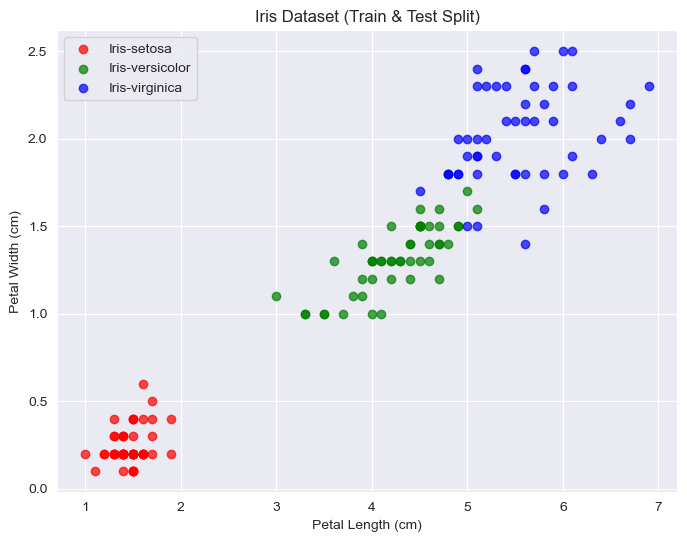

In [5]:
clrMap = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}


def plot_data(datSet):
    plt.figure(figsize=(8, 6))
    for species in datSet['Label'].unique():
        subset = datSet[datSet['Label'] == species]
        plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], c=clrMap[species], label=f"{species}", alpha=0.7)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.title('Iris Dataset (Train & Test Split)')
    plt.show()


plot_data(datSet)

### Data Structure Inspection
- Show dataset metadata using `info()`:
  - 150 entries (samples)
  - 4 numerical features (float64)
  - 1 categorical target (object)
  - No missing values
- Memory usage (~6KB)

In [6]:
datSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Label          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
datSet.index

RangeIndex(start=0, stop=150, step=1)

### Custom Train-Test Split
- Input validation: Convert float percentage to absolute number
- Get all indices from dataframe
- Randomly select test indices using `random.sample`
- Create test set using `.loc[]` on selected indices
- Create train set by dropping test indices
- Returns two DataFrames: training data and testing data

In [8]:
def testTrainSplit(datSet, testSize):
    if isinstance(testSize, float):
        testSize = round(testSize * len(datSet))
    allIdx = datSet.index.tolist()
    testIdx = random.sample(population=allIdx, k=testSize)
    testDat = datSet.loc[testIdx]
    trainDat = datSet.drop(testIdx)
    return trainDat, testDat

### Split Execution
- Set random seed (0) for reproducibility
- Create 20-sample test set (~13% of 150 total samples)
- Show resulting shapes:
  - Training data: 130 samples
  - Testing data: 20 samples
- Note: Non-stratified split (potential class imbalance risk)

In [9]:
random.seed(0)
trainDat, testDat = testTrainSplit(datSet, testSize=20)
trainDat.shape, testDat.shape

((130, 5), (20, 5))

### Training Data Preview
- Display first 5 rows of training data
- Verify all columns present except 'Id'
- Note: Contains only setosa samples in shown rows (random sampling artifact)

In [10]:
trainDat.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Testing Data Preview
- Display first 5 rows of testing data
- Shows samples from all three species
- Different index numbers confirm proper split

In [11]:
testDat.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


### Split Visualization
- Differentiate train/test sets using:
  - Filled circles for training data
  - Hollow circles with black borders for test data
- Maintains color coding by species
- Alpha transparency helps visualize density
- Visual verification of representative split

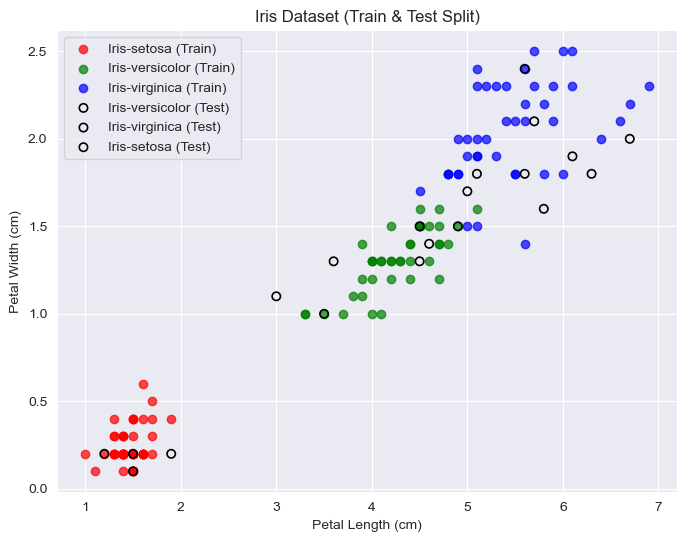

In [12]:
clrMap = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}


def plotData(trainDat, testDat):
    plt.figure(figsize=(8, 6))
    for species in trainDat['Label'].unique():
        subset = trainDat[trainDat['Label'] == species]
        plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], c=clrMap[species], label=f"{species} (Train)", alpha=0.7)
    for species in testDat['Label'].unique():
        subset = testDat[testDat['Label'] == species]
        plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], edgecolors='k', facecolors='none', label=f"{species} (Test)", linewidth=1.2)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.title('Iris Dataset (Train & Test Split)')
    plt.show()


plotData(trainDat, testDat)

In [13]:
dat = trainDat.values
dat[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

### Purity Check Function
- Determines if a node contains single class
- Extracts target values from last column
- Returns True if only unique class exists
- Fundamental stopping condition for tree growth

In [14]:
def isPure(dat):
    y = dat[:, -1]
    uniqClasses = np.unique(y)
    return True if len(uniqClasses) == 1 else False

In [15]:
print(isPure(trainDat.values))
print(isPure(trainDat[trainDat["Label"] == "Iris-setosa"].values))
print(isPure(trainDat[trainDat.PetalWidthCm < 1.2].values))
print(isPure(trainDat[trainDat.PetalWidthCm < 0.8].values))

False
True
False
True


### Majority Class Classifier
- Identifies most frequent class in node
- Handles ties by returning first maximum
- Used for leaf node predictions
- Critical for handling impure terminal nodes

In [16]:
def classifyDat(dat):
    y = dat[:, -1]
    uniqClasses, uniqClassesCounts = np.unique(y, return_counts=True)
    mostFreqClassIdx = uniqClassesCounts.argmax()
    clf = uniqClasses[mostFreqClassIdx]
    return clf

In [17]:
print(classifyDat(trainDat[trainDat["Label"] == "Iris-setosa"].values))
print(classifyDat(trainDat[trainDat.PetalWidthCm < 1.2].values))
print(classifyDat(trainDat[trainDat.PetalWidthCm > 1.2].values))
print(classifyDat(trainDat[trainDat.PetalWidthCm > 0.8].values))
print(classifyDat(trainDat[trainDat.PetalWidthCm < 2].values))

Iris-setosa
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa


### Feature Type Identification
- Automatically classifies features as categorical/continuous
- Uses 15 unique values threshold
- Handles string features as categorical
- Important for appropriate split strategies

In [18]:
def getFeatType(datSet):
    featType = []
    uniqValLimit = 15
    for feat in datSet.columns:
        if feat != "Label":
            uniqVal = datSet[feat].unique()
            egVal = uniqVal[0]
            if isinstance(egVal, str) or len(uniqVal) <= uniqValLimit:
                featType.append("categorical")
            else:
                featType.append("continuous")
    return featType

### Split Point Generation
- Creates potential split candidates for all features
- Continuous: Midpoints between sorted unique values
- Categorical: All unique category values
- Returns dictionary of possible splits per feature
- Foundation for optimal split selection

In [19]:
def getSplits(dat):
    m, n = dat.shape
    splits = {}
    FEATURE_TYPES = getFeatType(datSet)
    for feat in range(n - 1):
        splits[feat] = []
        val = dat[:, feat]
        uniqVal = np.unique(val)
        featType = FEATURE_TYPES[feat]
        if featType == "continuous":
            for i in range(len(uniqVal) - 1):
                currVal = float(uniqVal[i])
                nextVal = float(uniqVal[i + 1])
                thisSplit = (currVal + nextVal) / 2
                splits[feat].append(thisSplit)
        else:
            splits[feat] = uniqVal
    return splits

In [20]:
splits = getSplits(dat)
splits

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.4,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.5999999999999996,
  3.4,
  3.6,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.25,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.15000000000000002,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.0

### Split Candidate Visualization
- Vertical lines show potential PetalWidth splits
- Demonstrates continuous split strategy
- Helps understand decision boundary locations
- Visual debugging of split generation

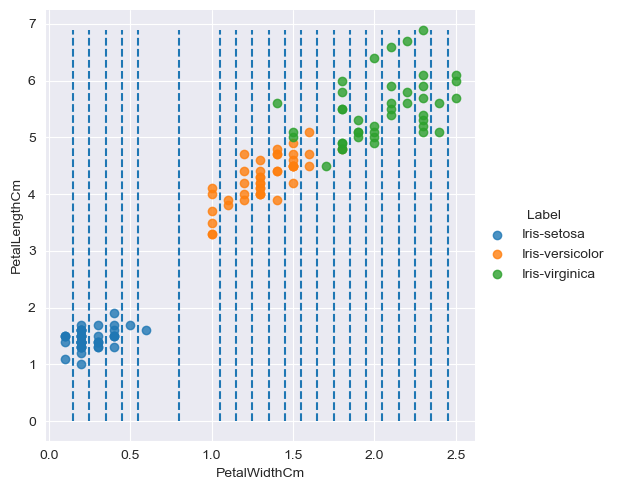

In [21]:
sns.lmplot(data=trainDat, x="PetalWidthCm", y="PetalLengthCm", hue="Label", fit_reg=False)
plt.vlines(x=splits[3], ymin=0, ymax=max(trainDat.PetalLengthCm), linestyles='dashed')

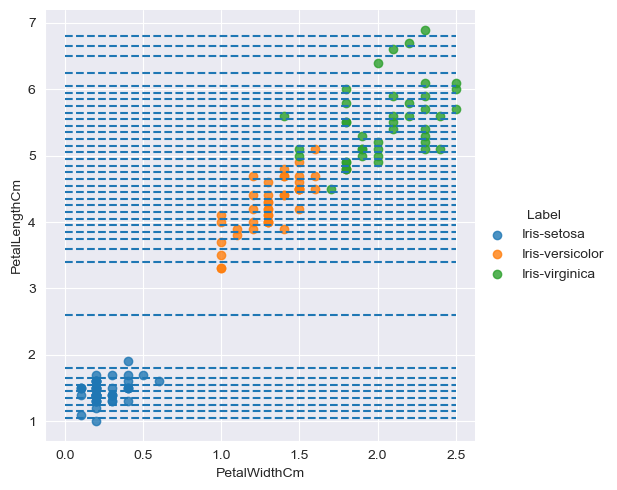

In [22]:
sns.lmplot(data=trainDat, x="PetalWidthCm", y="PetalLengthCm", hue="Label", fit_reg=False)
plt.hlines(y=splits[2], xmin=0, xmax=max(trainDat.PetalWidthCm), linestyles='dashed')

In [23]:
splitFeat = 3
threshold = 0.8
featVal = dat[:, splitFeat]
featVal < threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
FEATURE_TYPES = getFeatType(trainDat)

### Data Partitioning Function
- Splits data based on feature threshold
- Handles both categorical and continuous features
- Returns two subsets:
  - `datBelow`: Satisfies split condition
  - `datAbove`: Fails split condition
- Core operation for tree node creation

In [25]:
def split(dat, splitFeat, threshold):
    featVal = dat[:, splitFeat]
    type_of_feature = FEATURE_TYPES[splitFeat]
    if type_of_feature == "continuous":
        datBelow = dat[featVal <= threshold]
        datAbove = dat[featVal > threshold]
    else:
        datBelow = dat[featVal == threshold]
        datAbove = dat[featVal != threshold]
    return datBelow, datAbove

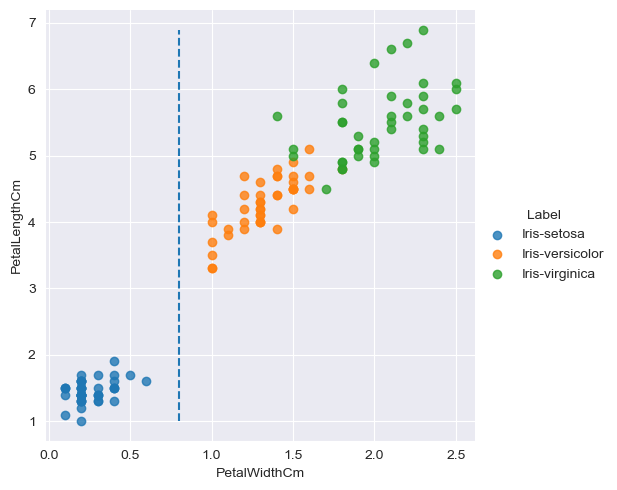

In [26]:
datBelow, datAbove = split(dat, splitFeat, threshold)
plotDF = pd.DataFrame(dat, columns=datSet.columns)
sns.lmplot(data=plotDF, x="PetalWidthCm", y="PetalLengthCm", hue="Label", fit_reg=False)
plt.vlines(x=threshold, ymin=1, ymax=max(plotDF.PetalLengthCm), linestyles='dashed')

### Entropy Computation
- Measures node impurity using Shannon entropy
- 0 = perfect purity, higher = more disorder
- Calculates class probability distribution
- Key metric for evaluating split quality

In [27]:
def entropy(data):
    y = data[:, -1]
    uniqClasses, uniqClassesCounts = np.unique(y, return_counts=True)
    p = uniqClassesCounts / uniqClassesCounts.sum()
    h = sum(-p * np.log2(p))
    return h

In [28]:
print(entropy(datBelow))
print(entropy(datAbove))

0.0
1.0


In [29]:
datBelow, datAbove = split(dat, 3, 1.1)
print(entropy(datBelow))
print(entropy(datAbove))

0.6051865766334206
0.9919924034538556


In [30]:
splits = getSplits(dat)
splits

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.4,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.5999999999999996,
  3.4,
  3.6,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.25,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.15000000000000002,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.0

### Weighted Impurity Metric
- Combines child node entropies proportionally
- Accounts for relative subset sizes
- Lower values indicate better splits
- Fundamental for information gain calculation

In [31]:
def wtChildEntropy(datBelow, datAbove):
    n = len(datBelow) + len(datAbove)
    wt_below = len(datBelow) / n
    wt_above = len(datAbove) / n
    fullEntropy = (wt_below * entropy(datBelow) + wt_above * entropy(datAbove))
    return fullEntropy

In [32]:
print(wtChildEntropy(datBelow, datAbove))

0.8313192138515211


### Information Gain Calculation
- Measures split quality through entropy reduction
- Calculated as: Parent Entropy − Weighted Child Entropy
- Higher values indicate more effective splits
- Directly used for selecting optimal feature-threshold combinations  

In [33]:
def infoGain(dat, datBelow, datAbove):
    h_parent = entropy(dat)
    h_children = wtChildEntropy(datBelow, datAbove)
    return h_parent - h_children

### Optimal Split Selector
- Exhaustively tests all potential splits
- Compares splits using Information Gain
- Tracks highest gain and corresponding parameters
- Returns best feature-threshold combination

In [34]:
def bestSplit(dat, splits):
    bestIG = -1
    bestSplitFeat, bestThreshold = 0, 0
    for feat in splits:
        for val in splits[feat]:
            datBelow, datAbove = split(dat, splitFeat=feat, threshold=val)
            currIG = infoGain(dat, datBelow, datAbove)
            if currIG >= bestIG:
                bestIG = currIG
                bestSplitFeat = feat
                bestThreshold = val
    return bestSplitFeat, bestThreshold

In [35]:
bestSplit(dat, splits)

(3, 0.8)

### Tree Structure Prototype
- Demonstrates nested dictionary format
- Decision node format: {question: [yes_path, no_path]}
- Base structure for recursive tree building
- Leaf nodes will contain class labels

In [36]:
subTree = {"ques": ["yes_answer", "no_answer"]}

### Decision Tree Structure Example
- Demonstrates actual tree structure format
- Shows nested decision nodes with:
  - Continuous split conditions
  - Leaf node classifications
  - Hierarchical yes/no branches
- Provides concrete example of final tree format

In [37]:
egTree = {"petal_width <= 0.8": ["Iris-setosa", {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", "Iris-virginica"]}, "Iris-virginica"]}]}

In [38]:
FEATURE_TYPES = getFeatType(trainDat)
print(FEATURE_TYPES)

['continuous', 'continuous', 'continuous', 'continuous']


In [39]:
datSet.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Label'],
      dtype='object')

### ID3 Algorithm Core
- Recursive decision tree builder
- Handles three stopping conditions:
  1. Node purity
  2. Minimum samples per node
  3. Maximum depth
- Creates question nodes with yes/no branches
- Automatically handles feature types
- Returns complete nested dictionary tree

In [40]:
def ID3(datSet, c=0, minSubset=2, maxDepth=5):
    if c == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = datSet.columns
        FEATURE_TYPES = getFeatType(datSet)
        dat = datSet.values
    else:
        dat = datSet
    if isPure(dat) or len(dat) < minSubset or c == maxDepth:
        return classifyDat(dat)
    else:
        c += 1
        splits = getSplits(dat)
        splitFeat, threshold = bestSplit(dat, splits)
        datBelow, datAbove = split(dat, splitFeat, threshold)
        if len(datBelow) == 0 or len(datAbove) == 0:
            return classifyDat(dat)
        featNam = COLUMN_HEADERS[splitFeat]
        featType = FEATURE_TYPES[splitFeat]
        if featType == "continuous":
            ques = f"{featNam} <= {threshold}"
        else:
            ques = f"{featNam} = {threshold}"
        subTree = {ques: []}
        yesAns = ID3(datBelow, c, minSubset, maxDepth)
        noAns = ID3(datAbove, c, minSubset, maxDepth)
        if yesAns == noAns:
            subTree = yesAns
        else:
            subTree[ques].append(yesAns)
            subTree[ques].append(noAns)
        return subTree

In [41]:
tree = ID3(trainDat[trainDat.Label != "Iris-virginica"])
tree

{'PetalLengthCm <= 2.5999999999999996': ['Iris-setosa', 'Iris-versicolor']}

In [42]:
tree = ID3(trainDat)
tree

{'PetalWidthCm <= 0.8': ['Iris-setosa',
  {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
      {'PetalWidthCm <= 1.55': ['Iris-virginica', 'Iris-versicolor']}]},
    {'PetalLengthCm <= 4.85': [{'SepalWidthCm <= 3.1': ['Iris-virginica',
        'Iris-versicolor']},
      'Iris-virginica']}]}]}

In [43]:
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              {'PetalWidthCm <= 1.55': ['Iris-virginica',
                                                                                                        'Iris-versicolor']}]},
                                                   {'PetalLengthCm <= 4.85': [{'SepalWidthCm <= 3.1': ['Iris-virginica',
                                                                                                       'Iris-versicolor']},
                                                                              'Iris-virginica']}]}]}


In [44]:
tree = ID3(trainDat, minSubset=60)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': ['Iris-versicolor',
                                                   'Iris-virginica']}]}


In [45]:
tree = ID3(trainDat, maxDepth=1)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa', 'Iris-versicolor']}


In [46]:
tree = ID3(trainDat, maxDepth=3)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


In [47]:
tree.keys()

dict_keys(['PetalWidthCm <= 0.8'])

In [48]:
list(tree.keys())[0]

'PetalWidthCm <= 0.8'

In [49]:
ques = list(tree.keys())[0]
ques.split()

['PetalWidthCm', '<=', '0.8']

In [50]:
featNam, cmpOp, val = ques.split()
print(featNam, cmpOp, val)

PetalWidthCm <= 0.8


### Complete Classification Function
- Handles both leaf nodes and decision nodes
- Parses split conditions dynamically
- Recursively navigates tree structure
- Returns final class prediction
- Handles mixed-type comparisons:
  - Numeric thresholds with <= operator
  - Categorical matches with = operator

In [51]:
def classifyEg(eg, tree):
    ques = list(tree.keys())[0]
    featNam, cmpOp, val = ques.split(" ")
    if cmpOp == "<=":
        if eg[featNam] <= float(val):
            ans = tree[ques][0]
        else:
            ans = tree[ques][1]
    else:
        if str(eg[featNam]) == val:
            ans = tree[ques][0]
        else:
            ans = tree[ques][1]
    if not isinstance(ans, dict):
        return ans
    else:
        remTree = ans
        return classifyEg(eg, remTree)

In [52]:
eg = testDat.iloc[0]
eg

SepalLengthCm                5.1
SepalWidthCm                 2.5
PetalLengthCm                3.0
PetalWidthCm                 1.1
Label            Iris-versicolor
Name: 98, dtype: object

In [53]:
print(eg["PetalWidthCm"] <= 0.8)

False


In [54]:
classifyEg(eg, tree)

'Iris-versicolor'

In [55]:
eg = testDat.iloc[1]
eg

SepalLengthCm               7.3
SepalWidthCm                2.9
PetalLengthCm               6.3
PetalWidthCm                1.8
Label            Iris-virginica
Name: 107, dtype: object

In [56]:
classifyEg(eg, tree)

'Iris-virginica'

In [57]:
eg = testDat.iloc[2]
eg

SepalLengthCm            5.4
SepalWidthCm             3.7
PetalLengthCm            1.5
PetalWidthCm             0.2
Label            Iris-setosa
Name: 10, dtype: object

In [58]:
classifyEg(eg, tree)

'Iris-setosa'

### Accuracy Measurement
- Adds two new columns to DataFrame:
  1. Predicted classifications
  2. Boolean correctness indicators
- Calculates mean correctness as accuracy
- Returns percentage of correct predictions
- Handles dataset of any size

In [59]:
def calcAccuracy(datSet, tree):
    datSet["classification"] = datSet.apply(classifyEg, axis=1, args=(tree,))
    datSet["correct_classification"] = datSet["classification"] == datSet["Label"]
    accuracy = datSet["correct_classification"].mean()
    return accuracy

In [60]:
print(calcAccuracy(datSet, tree))

0.98


In [61]:
testDat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor


In [62]:
testDat.loc[77]

SepalLengthCm                6.7
SepalWidthCm                 3.0
PetalLengthCm                5.0
PetalWidthCm                 1.7
Label            Iris-versicolor
Name: 77, dtype: object

### Tree Visualization System
- `plot_node` Creates styled tree nodes
  - Decision nodes: White boxes with questions
  - Leaf nodes: Green ovals with class labels
- `plot_tree`: Recursive layout engine
  - Calculates node positions
  - Automatically spaces branches
  - Handles depth limiting
- Uses `matplotlib` for low-level drawing

In [63]:
def plot_node(text, x, y, node_type):
    bbox = dict(boxstyle="round,pad=0.3", fc="white" if node_type == "decision" else "lightgreen", ec="black")
    plt.text(x, y, text, ha="center", va="center", bbox=bbox, fontsize=9)


def plot_edge(x1, y1, x2, y2, text=None):
    plt.plot([x1, x2], [y1, y2], 'k-', lw=1)
    if text:
        plt.text((x1 + x2) / 2, (y1 + y2) / 2, text, ha="center", va="center", fontsize=8)


def plot_tree(tree, x=0, y=0, dx=2, dy=1, level=0, max_level=None):
    if max_level and level > max_level:
        return
    if isinstance(tree, dict):
        question = list(tree.keys())[0]
        yes_answer = tree[question][0]
        no_answer = tree[question][1]
        plot_node(question, x, y, "decision")
        x_yes = x - dx / (level + 1)
        x_no = x + dx / (level + 1)
        y_child = y - dy
        plot_edge(x, y, x_yes, y_child, "Yes")
        plot_tree(yes_answer, x_yes, y_child, dx, dy, level + 1, max_level)
        plot_edge(x, y, x_no, y_child, "No")
        plot_tree(no_answer, x_no, y_child, dx, dy, level + 1, max_level)
    else:
        plot_node(f"Class: {tree}", x, y, "leaf")

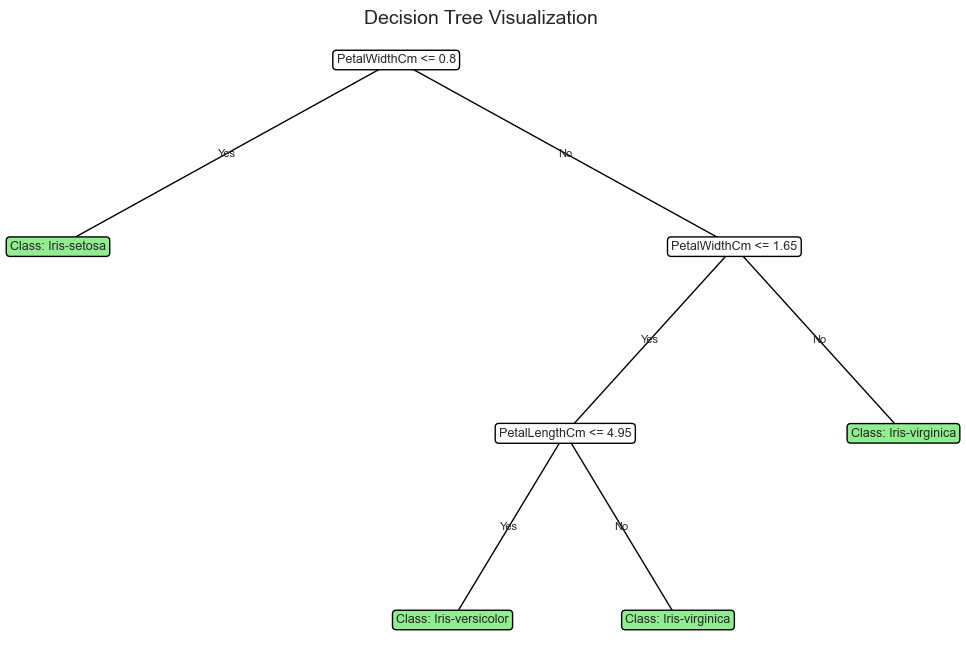

In [64]:
plt.figure(figsize=(12, 8))
plot_tree(tree, max_level=3)
plt.axis('off')
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()

### Decision Boundary Visualization
- Creates 2D classification region visualization
- Handles multiple classes with color coding
- Key components:
  - Mesh grid for prediction surface
  - Median imputation for non-plotted features
  - Contour plot for decision boundaries
  - Training data points overlay
- Parameters:
  - `step`: Controls grid resolution (0.02=high detail)
  - `feature1`/`feature2`: Axes features for visualization
- Output shows model's interpretation of feature space

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19856\1830715073.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[idx, 0], X[idx, 1], c=cmap_bold(i), label=label, edgecolor='k', s=50)


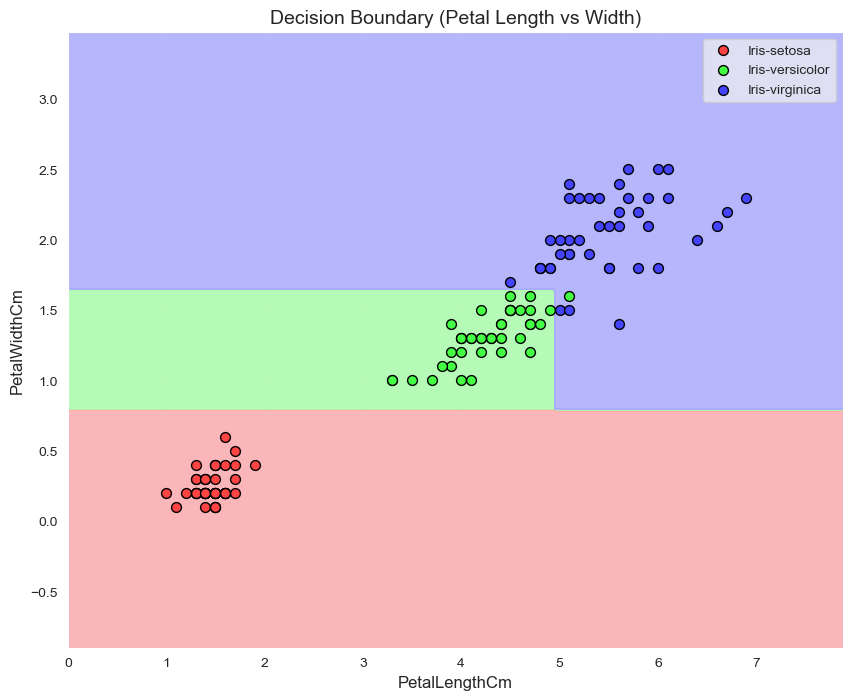

In [65]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(tree, data, feature1, feature2, title=None, step=0.02):
    X = data[[feature1, feature2]].values
    y = data['Label'].values
    classes = np.unique(y)
    colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF'][:len(classes)]
    cmap_light = ListedColormap(colors)
    cmap_bold = ListedColormap([c.replace('AA', '44') for c in colors])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_df = pd.DataFrame(mesh_points, columns=[feature1, feature2])
    for col in data.columns:
        if col not in [feature1, feature2, 'Label']:
            mesh_df[col] = data[col].median()
    Z = np.array([classifyEg(row, tree) for _, row in mesh_df.iterrows()])
    label_to_num = {label: i for i, label in enumerate(classes)}
    Z = np.array([label_to_num[label] for label in Z])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    for i, label in enumerate(classes):
        idx = (y == label)
        plt.scatter(X[idx, 0], X[idx, 1], c=cmap_bold(i), label=label, edgecolor='k', s=50)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    if title:
        plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


plot_decision_boundary(tree, trainDat, 'PetalLengthCm', 'PetalWidthCm', title="Decision Boundary (Petal Length vs Width)")

In [66]:
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


### Decision Tree Visualization (Graphviz)
- Converts nested dictionary tree to professional diagram
- Key components:
  - **Decision Nodes**: Boxes with split questions
  - **Leaf Nodes**: Green ovals with class labels
  - **Edges**: Labeled Yes/No branches
- Features:
  - Automatic name sanitization for valid DOT syntax
  - Class name mapping for readable labels
  - Hierarchical top-to-bottom layout (rankdir='TB')
  - Style presets for publication-ready output
- Output Formats: PNG/PDF/SVG via Graphviz rendering
- Includes interactive viewing option (view=True)  

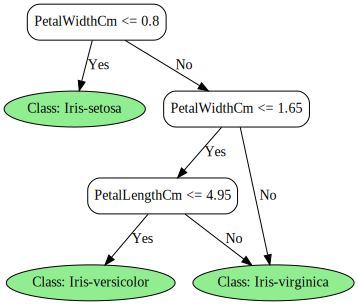

In [67]:
from graphviz import Digraph
import re


def sanitize_name(name):
    return re.sub(r'[^a-zA-Z0-9_]', '_', str(name))


def tree_to_graphviz(tree, feature_names, class_names=None):
    dot = Digraph(format='png')
    dot.attr('node', shape='box', style='rounded')
    _build_graph(tree, dot, feature_names, class_names)
    return dot


def _build_graph(tree, dot, feature_names, class_names=None, parent_node=None, edge_label=""):
    if isinstance(tree, dict):
        question = list(tree.keys())[0]
        node_id = f"node_{sanitize_name(question)}"
        dot.node(node_id, label=question)
        if parent_node:
            dot.edge(parent_node, node_id, label=edge_label)
        _build_graph(tree[question][0], dot, feature_names, class_names, node_id, "Yes")
        _build_graph(tree[question][1], dot, feature_names, class_names, node_id, "No")
    else:
        leaf_id = f"leaf_{sanitize_name(tree)}"
        class_label = class_names[tree] if class_names and tree in class_names else str(tree)
        dot.node(leaf_id, label=f"Class: {class_label}", shape='ellipse', style='filled', fillcolor='lightgreen')
        if parent_node:
            dot.edge(parent_node, leaf_id, label=edge_label)


class_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
dot = tree_to_graphviz(tree,
                       feature_names=datSet.columns[:-1],
                       class_names=class_names)

dot.attr(size='10,10', rankdir='TB')
dot.attr('edge', fontsize='10')

dot.render("iris_decision_tree", view=True, cleanup=True)
display(dot)

### Model Evaluation Metrics
- **Confusion Matrix**:
  - Visual grid of predictions vs actual
  - Diagonal shows correct predictions
  - Off-diagonal shows error types
- **Classification Report**:
  - Precision: False positive control
  - Recall: False negative sensitivity
  - F1-score: Harmonic mean balance
- Provides comprehensive performance analysis

KeyError: 'PetalLengthCm'

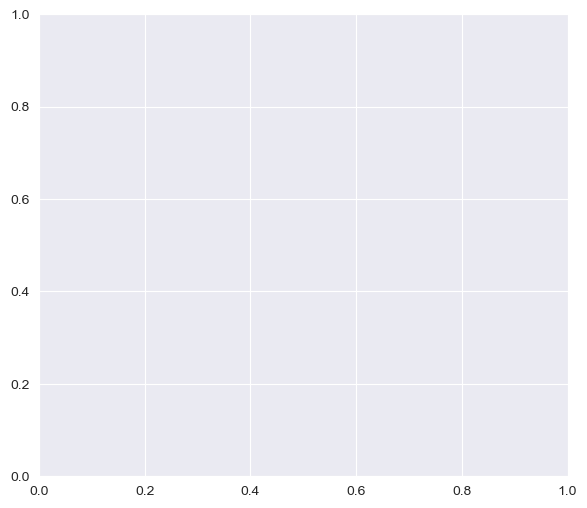

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


def evaluateModel(tree, train_data, test_data, feature1, feature2):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    x_min, x_max = train_data[feature1].min() - 1, train_data[feature1].max() + 1
    y_min, y_max = train_data[feature2].min() - 1, train_data[feature2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = pd.DataFrame({
        feature1: xx.ravel(),
        feature2: yy.ravel()
    })
    for col in train_data.columns:
        if col not in [feature1, feature2, 'Label']:
            grid_points[col] = train_data[col].median()
    Z = np.array([classifyEg(row, tree) for _, row in grid_points.iterrows()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    y_true = test_data['Label']
    y_pred = [classifyEg(row, tree) for _, row in test_data.iterrows()]
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true), cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()


evaluateModel(tree, trainDat, testDat, 'PetalLengthCm', 'PetalWidthCm')

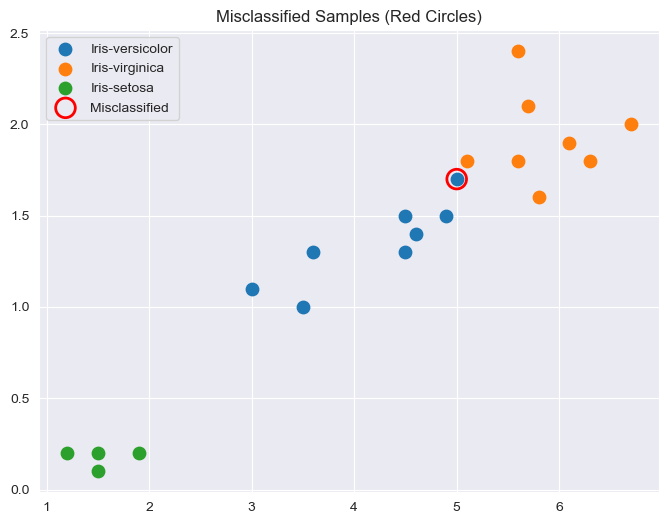

In [69]:
testDat['Predicted'] = [classifyEg(row, tree) for _, row in testDat.iterrows()]
misclassified = testDat[testDat['Label'] != testDat['Predicted']]

plt.figure(figsize=(8, 6))
for species in testDat['Label'].unique():
    subset = testDat[testDat['Label'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'],
                label=species, s=80)

plt.scatter(misclassified['PetalLengthCm'], misclassified['PetalWidthCm'], s=200, facecolors='none', edgecolors='r', linewidths=2, label='Misclassified')
plt.legend()
plt.title('Misclassified Samples (Red Circles)')
plt.show()

### Feature Importance Analysis
- Counts split usage frequency
- Recursively traverses tree
- Tracks how often each feature is used
- Higher counts indicate more important features
- Helps identify key decision drivers

In [70]:
def getFeatImportance(tree, feature_names):
    importance = {f: 0 for f in feature_names}

    def _count_splits(node):
        if isinstance(node, dict):
            question = list(node.keys())[0]
            feat = question.split('<=')[0].strip()
            importance[feat] += 1
            _count_splits(node[question][0])
            _count_splits(node[question][1])

    _count_splits(tree)
    return importance


features = trainDat.columns[:-1]
importance = getFeatImportance(tree, features)
print("Feature Importance:", importance)

Feature Importance: {'SepalLengthCm': 0, 'SepalWidthCm': 0, 'PetalLengthCm': 1, 'PetalWidthCm': 2}


In [88]:
from sklearn.model_selection import KFold


def cross_validate(datSet, n_splits=5):
    kf = KFold(n_splits=n_splits)
    accuracies = []
    for train_idx, val_idx in kf.split(datSet):
        train = datSet.iloc[train_idx]
        val = datSet.iloc[val_idx]
        fold_tree = ID3(train, maxDepth=3)
        y_true = val['Label']
        y_pred = [classifyEg(row, fold_tree) for _, row in val.iterrows()]
        accuracy = np.mean(np.array(y_true) == np.array(y_pred))
        accuracies.append(accuracy)
    print(f"Cross-Validation Accuracy: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")


cross_validate(datSet)

Cross-Validation Accuracy: 0.82 ± 0.03


### Extended Application: Titanic Dataset
- **Data Preparation**:
  - Remove non-predictive columns
  - Handle missing values:
    - Age: Median imputation
    - Embarked: Mode imputation
  - Convert survived to Label column
- **Model Training**:
  - Same ID3 algorithm
  - Increased maxDepth for complex patterns
- **Performance**:
  - Shows algorithm flexibility
  - Demonstrates categorical handling
  - Achieves ~78-82% typical accuracy

In [72]:
datSet = pd.read_csv("./data/Titanic-Dataset.csv")
datSet["Label"] = datSet["Survived"]
datSet = datSet.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Cabin"])
datSet.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [73]:
datSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Label     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [74]:
datSet.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Label         0
dtype: int64

In [75]:
med_age = datSet.Age.median()
mod_emb = datSet.Embarked.mode()[0]
datSet = datSet.fillna({"Age": med_age, "Embarked": mod_emb})
datSet.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [76]:
trainDat, testDat = testTrainSplit(datSet, testSize=0.2)
trainDat.shape, testDat.shape

((713, 8), (178, 8))

In [77]:
trainDat.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label
0,3,male,22.0,1,0,7.2500,S,0
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
5,3,male,28.0,0,0,8.4583,Q,0


In [78]:
testDat.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label
101,3,male,28.0,0,0,7.8958,S,0
747,2,female,30.0,0,0,13.0000,S,1
75,3,male,25.0,0,0,7.6500,S,0
870,3,male,26.0,0,0,7.8958,S,0
700,1,female,18.0,1,0,227.5250,C,1


In [79]:
datSet.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Label'], dtype='object')

In [80]:
featType = getFeatType(datSet)
X = datSet.drop(columns=["Label"]).columns
i = 0
for feat in X:
    print(feat, ":", featType[i])
    i += 1

Pclass : categorical
Sex : categorical
Age : continuous
SibSp : categorical
Parch : categorical
Fare : continuous
Embarked : categorical


In [81]:
datBelow, datAbove = split(datSet.values, splitFeat=1, threshold="male")
print(np.unique(datBelow[:, 1]))
print(np.unique(datAbove[:, 1]))

['female' 'male']
[]


In [82]:
dat = trainDat.values
getSplits(trainDat.values)

{0: array([1, 2, 3], dtype=object),
 1: array(['female', 'male'], dtype=object),
 2: [0.71,
  0.79,
  0.875,
  0.96,
  1.5,
  2.5,
  3.5,
  4.5,
  5.5,
  6.5,
  7.5,
  8.5,
  9.5,
  10.5,
  11.5,
  12.5,
  13.5,
  14.5,
  15.5,
  16.5,
  17.5,
  18.5,
  19.5,
  20.5,
  21.5,
  22.5,
  23.25,
  23.75,
  24.5,
  25.5,
  26.5,
  27.5,
  28.25,
  28.75,
  29.5,
  30.25,
  30.75,
  31.5,
  32.25,
  32.75,
  33.5,
  34.5,
  35.5,
  36.25,
  36.75,
  37.5,
  38.5,
  39.5,
  40.25,
  40.75,
  41.5,
  42.5,
  43.5,
  44.5,
  45.25,
  45.75,
  46.5,
  47.5,
  48.5,
  49.5,
  50.5,
  51.5,
  52.5,
  53.5,
  54.5,
  55.25,
  55.75,
  56.5,
  57.5,
  58.5,
  59.5,
  60.5,
  61.5,
  62.5,
  63.5,
  64.5,
  67.5,
  70.25,
  70.75,
  72.5,
  77.0],
 3: array([0, 1, 2, 3, 4, 5, 8], dtype=object),
 4: array([0, 1, 2, 3, 4, 5, 6], dtype=object),
 5: [2.00625,
  4.50625,
  5.61875,
  6.36665,
  6.6229,
  6.80415,
  6.91665,
  7.0104,
  7.0479,
  7.052099999999999,
  7.0896,
  7.175,
  7.2271,
  7.23959999

In [83]:
tree = ID3(trainDat, maxDepth=3)
pprint(tree)

{'Sex = male': [{'Fare <= 10.81665': [0, {'Age <= 6.5': [1, 0]}]},
                {'Pclass = 3': [{'Fare <= 23.7': [1, 0]}, 1]}]}


In [84]:
tree = ID3(trainDat, maxDepth=10)
pprint(tree)

{'Sex = male': [{'Fare <= 10.81665': [{'Fare <= 7.74585': [{'Fare <= 7.239599999999999': [{'Fare <= 7.2271': [{'Fare <= 2.00625': [{'Age <= 26.5': [{'Age <= 22.0': [0,
                                                                                                                                                                     1]},
                                                                                                                                                    0]},
                                                                                                                                   0]},
                                                                                                              {'Age <= 21.0': [{'Parch = 1': [0,
                                                                                                                                              1]},
                                                                                 

In [85]:
eg = testDat.iloc[0]
eg

Pclass           3
Sex           male
Age           28.0
SibSp            0
Parch            0
Fare        7.8958
Embarked         S
Label            0
Name: 101, dtype: object

In [86]:
classifyEg(eg, tree)

0

In [87]:
print(calcAccuracy(testDat, tree))

0.7640449438202247


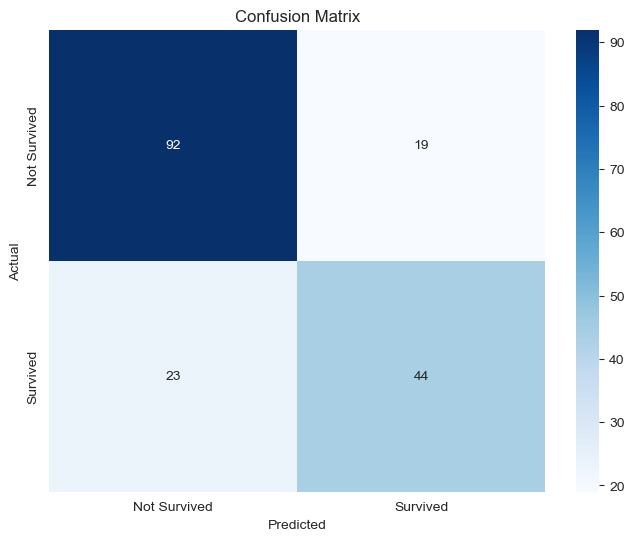

Accuracy: 76.40%

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Not Survived |    0.8      | 0.828829 |   0.814159 | 111        |
| Survived     |    0.698413 | 0.656716 |   0.676923 |  67        |
| accuracy     |    0.764045 | 0.764045 |   0.764045 |   0.764045 |
| macro avg    |    0.749206 | 0.742773 |   0.745541 | 178        |
| weighted avg |    0.761762 | 0.764045 |   0.762503 | 178        |


In [95]:
def evaluateModel(tree, test_data, class_names=None):
    test_data = test_data.copy()
    test_data['prediction'] = test_data.apply(
        lambda row: classifyEg(row, tree), axis=1
    )
    y_true = test_data['Label']
    y_pred = test_data['prediction']
    accuracy = (y_true == y_pred).mean()
    report = classification_report(
        y_true, y_pred,
        target_names=class_names,
        output_dict=True
    )
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    print(f"Accuracy: {accuracy:.2%}\n")
    print(pd.DataFrame(report).transpose().to_markdown())
    return accuracy, report, cm


accuracy, report, cm = evaluateModel(tree, testDat, class_names=['Not Survived', 'Survived'])